# Building CNNs with Keras

This example has been adapted from: https://towardsdatascience.com/deep-learning-to-identify-malaria-cells-using-cnn-on-kaggle-b9a987f55ea5

In this tutorial we learn how to build convolutional neural networks in Keras. To do so, we will classify images of malaria cells into two categories: Infected and Uninfected.

## Importing required libraries

We first begin by importing the required python libraries. For this tutorial, we would be using Tensorflow as the backend for Keras.


In [1]:
import cv2
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

np.random.seed(1000)
%matplotlib inline

Using TensorFlow backend.
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/envs/tensorfl

## Importing Data

We now import the images that we will use for classification.There are two sets of images present in the dataset, infected and uninfected, let us go ahead and load them.

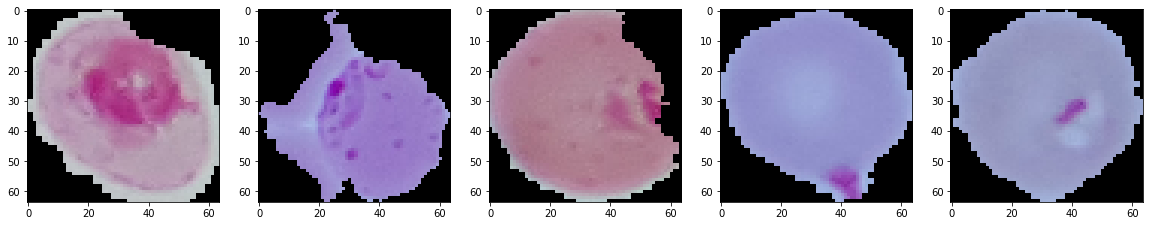

In [2]:
DATA_DIR = '/home/usr/data/cell_images/'
SIZE = 64
dataset = []
label = []

parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

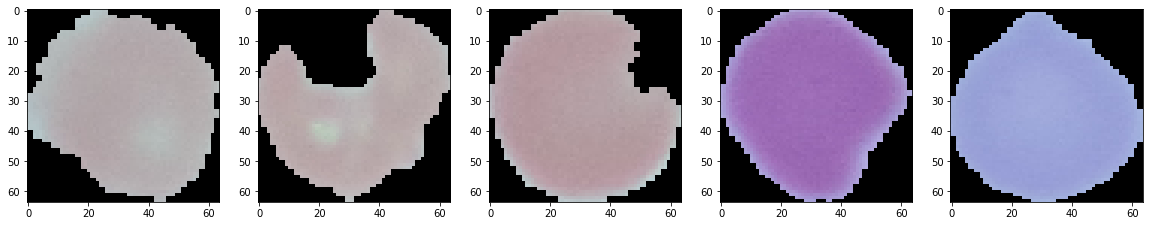

In [3]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    try:
        if (image_name.split('.')[1] == 'png'):
            image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)
    except Exception:
        print("Could not read image {} with name {}".format(i, image_name))

plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

## Building and Training a CNN

Now that we have our data, we can start by building a CNN that classifies these images.

### Convolutional Neural Networks

The Convolutional Neural Network is one of the most effective neural networks to work with images and make classifications.

.... Give a primer about CNNs here ... (Also links to their Keras API)

In [4]:
classifier = None
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
classifier.add(Dense(activation = 'sigmoid', units=2))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(classifier.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [6]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 2, 
                         epochs = 50, 
                         validation_split = 0.1,
                         shuffle = False)

Instructions for updating:
Use tf.cast instead.
Train on 19841 samples, validate on 2205 samples
Epoch 1/50
 - 59s - loss: 0.4391 - acc: 0.7903 - val_loss: 1.0577 - val_acc: 0.7610
Epoch 2/50
 - 55s - loss: 0.2189 - acc: 0.9173 - val_loss: 0.3057 - val_acc: 0.9061
Epoch 3/50
 - 54s - loss: 0.1855 - acc: 0.9312 - val_loss: 0.1860 - val_acc: 0.9156
Epoch 4/50
 - 56s - loss: 0.1655 - acc: 0.9366 - val_loss: 0.1752 - val_acc: 0.9447
Epoch 5/50
 - 53s - loss: 0.1486 - acc: 0.9433 - val_loss: 0.2910 - val_acc: 0.8939
Epoch 6/50
 - 54s - loss: 0.1384 - acc: 0.9453 - val_loss: 0.2137 - val_acc: 0.9274
Epoch 7/50
 - 54s - loss: 0.1235 - acc: 0.9523 - val_loss: 0.2340 - val_acc: 0.9329
Epoch 8/50
 - 54s - loss: 0.1055 - acc: 0.9576 - val_loss: 0.1739 - val_acc: 0.9478
Epoch 9/50
 - 53s - loss: 0.0936 - acc: 0.9620 - val_loss: 0.1642 - val_acc: 0.9447
Epoch 10/50
 - 53s - loss: 0.0823 - acc: 0.9660 - val_loss: 0.1784 - val_acc: 0.9560
Epoch 11/50
 - 53s - loss: 0.0695 - acc: 0.9702 - val_loss: 0.

In [7]:
print("Test_Accuracy: {:.2f}%".format(classifier.evaluate(np.array(X_test), np.array(y_test))[1]*100))

5512/5512 [==============================] - 4s 701us/step
Test_Accuracy: 95.26%


## Conclusion